In [171]:
import enum
import numpy as np
from matplotlib import pyplot as plt

In [80]:
def rec_easy(arr, av, to_place):
    if arr[to_place] != 0:
        return arr
    
    sits = []
    def copy_add(arr, el, idx, where, avail):
        arr_el = arr.copy()
        arr_el[idx] = el
        ret = rec_easy(arr_el, avail, (idx+1)%len(arr_el))
        if isinstance(ret, list) and len(ret)>0:
            if isinstance(ret[0], int):
                where.append(ret)
            elif isinstance(ret[0], list):
                where += ret
    
    for i, el in enumerate(av):
        if el != to_place:
            copy_add(arr, el, to_place, sits, av[:i]+av[i+1:])
    
    return sits
    
    

In [84]:
arr = [0]*4
avail = [1,2,2,3]

A = rec_easy(arr, avail, 0)
A.sort()
A

[[1, 2, 3, 2],
 [1, 2, 3, 2],
 [2, 2, 3, 1],
 [2, 2, 3, 1],
 [2, 3, 1, 2],
 [2, 3, 1, 2],
 [3, 2, 1, 2],
 [3, 2, 1, 2]]

In [85]:
# planet X - 'X'
# comet - 'C'
# dwarf planet - 'D'
# nebula - 'N'
# asteroid - 'A'
# empty sector -'E'

class objects(enum.IntEnum):
    not_chosen = 0
    X = 1
    C = 2
    D = 3
    N = 4
    A = 5
    E = 6
    
comet_available = [1,2,4,6,10,12,16] # basic and expert are same

In [109]:
def check_pos_basic(position):
    '''
    Checks if the board is correct (only basic version)
    return 
    - True if the board is correct
    - False if something on the board is wrong
    '''
    
    for i, el in enumerate(position):
        prev_idx = (i-1)%12
        next_idx = (i+1)%12
        
        if el == objects.X:
            if position[prev_idx] == objects.D or position[next_idx] == objects.D:                
                return False
                
        elif el == objects.C:
            if i not in comet_available:
                return False      

        elif el == objects.N:
            if position[prev_idx] != objects.E and position[next_idx] != objects.E:
                return False

        elif el == objects.A:
            if position[prev_idx] != objects.A and position[next_idx] != objects.A:
                return False
            
    return True

def recursive_put(cur_pos, available, to_place):
    '''
    recursive function to get all board positions
    only 12 sectors for now
    '''
    if cur_pos[to_place] != objects.not_chosen:
        if check_pos_basic(cur_pos):
            return cur_pos
    
    situations = []
    def copy_and_add(cur_pos, obj, to_place, available, where):
        pos = cur_pos.copy()
        pos[to_place] = obj
        ret = recursive_put(pos,available, (to_place+1)%len(pos))
        
        if isinstance(ret, list) and len(ret)>0:
            if isinstance(ret[0], int):
                where.append(ret)
            elif isinstance(ret[0], list):
                where += ret      
    
    pprev_idx = (to_place-2)%12
    prev_idx = (to_place-1)%12
    next_idx = (to_place+1)%12
    
    if cur_pos[prev_idx] == objects.A and cur_pos[pprev_idx] != objects.A:
        if objects.A in available:
            idx = available.index(objects.A)
            copy_and_add(cur_pos, objects.A, to_place, available[:idx]+available[idx+1:], situations)
        else:
            return -1
    
    elif cur_pos[prev_idx] == objects.N and cur_pos[pprev_idx] != objects.E:
        if objects.E in available:
            idx = available.index(objects.E)
            copy_and_add(cur_pos, objects.E, to_place, available[:idx]+available[idx+1:], situations)
        else:
            return -1
        
    else:
        cnt = 0
        for i, el in enumerate(available):
            if el == objects.X:
                if cur_pos[prev_idx] != objects.D and cur_pos[next_idx] != objects.D:
                    copy_and_add(cur_pos, el, to_place, available[:i]+available[i+1:], situations)

            elif el == objects.C:
                if to_place in comet_available:
                    cnt +=1
                    copy_and_add(cur_pos, el, to_place, available[:i]+available[i+1:], situations)

            elif el == objects.D:
                if cur_pos[prev_idx] != objects.X and cur_pos[next_idx] != objects.X:
                    cnt +=1
                    copy_and_add(cur_pos, el, to_place, available[:i]+available[i+1:], situations)        

            elif el == objects.N:
                cnt +=1
                copy_and_add(cur_pos, el, to_place, available[:i]+available[i+1:], situations)

            elif el == objects.A:
                cnt +=1
                copy_and_add(cur_pos, el, to_place, available[:i]+available[i+1:], situations)

            elif el == objects.E:
                cnt +=1
                copy_and_add(cur_pos, el, to_place, available[:i]+available[i+1:], situations)         

#         if cnt == 0:
#             return -1
        
    return situations

In [112]:
available = [objects.A]*4 + [objects.C]*2 + [objects.D]*1 + [objects.E]*2 + [objects.N]*2
available

[<objects.A: 5>,
 <objects.A: 5>,
 <objects.A: 5>,
 <objects.A: 5>,
 <objects.C: 2>,
 <objects.C: 2>,
 <objects.D: 3>,
 <objects.E: 6>,
 <objects.E: 6>,
 <objects.N: 4>,
 <objects.N: 4>]

In [114]:
%%time
all_basic_situations = []
for planet_X_idx in range(12):
    start_pos = [objects.not_chosen]*planet_X_idx + [objects.X] + [objects.not_chosen]*(11-planet_X_idx)
    situations_i = recursive_put(start_pos, available, (planet_X_idx+1)%12)
    all_basic_situations += situations_i
len(all_basic_situations)

Wall time: 11.1 s


213408

In [132]:
all_basic_situations = all_basic_situations
basic_situations = []
for el in all_basic_situations:
    if el not in basic_situations:
        basic_situations.append(el)
len(basic_situations)

4446

In [140]:
n = np.random.randint(len(basic_situations))
n, basic_situations[n]

(1361,
 [<objects.A: 5>,
  <objects.D: 3>,
  <objects.C: 2>,
  <objects.X: 1>,
  <objects.C: 2>,
  <objects.N: 4>,
  <objects.E: 6>,
  <objects.N: 4>,
  <objects.E: 6>,
  <objects.A: 5>,
  <objects.A: 5>,
  <objects.A: 5>])

**Вероятность найти объект в каждом из секторов**

In [173]:
def obj_prob(obj, all_variants):
    count = [0]*len(all_variants[0])
    for el in all_variants:
        for i, ob in enumerate(el):
            count[i] += (1 if ob == obj else 0)
    p = [el/len(all_variants) for el in count]
    return p

In [174]:
sector_prob = [[] for _ in range(12)]
objects_prob = [[0]*12 for _ in range(len(objects)-1)]

for obj in objects:
    if obj == objects.not_chosen:
        continue
    P = obj_prob(obj, basic_situations)
    objects_prob[obj.value-1] = P
    print(obj)
    for i, p in enumerate(P):
        print(f'В {i+1} секторе: {np.round(p*100, 3)}%')
        sector_prob[i].append([obj, p])
    print()


objects.X
В 1 секторе: 7.31%
В 2 секторе: 8.592%
В 3 секторе: 3.914%
В 4 секторе: 14.912%
В 5 секторе: 1.867%
В 6 секторе: 17.319%
В 7 секторе: 2.317%
В 8 секторе: 14.013%
В 9 секторе: 2.946%
В 10 секторе: 12.91%
В 11 секторе: 4.813%
В 12 секторе: 9.087%

objects.C
В 1 секторе: 0.0%
В 2 секторе: 39.136%
В 3 секторе: 44.804%
В 4 секторе: 0.0%
В 5 секторе: 35.897%
В 6 секторе: 0.0%
В 7 секторе: 37.517%
В 8 секторе: 0.0%
В 9 секторе: 0.0%
В 10 секторе: 0.0%
В 11 секторе: 42.645%
В 12 секторе: 0.0%

objects.D
В 1 секторе: 7.31%
В 2 секторе: 8.592%
В 3 секторе: 3.914%
В 4 секторе: 14.912%
В 5 секторе: 1.867%
В 6 секторе: 17.319%
В 7 секторе: 2.317%
В 8 секторе: 14.013%
В 9 секторе: 2.946%
В 10 секторе: 12.91%
В 11 секторе: 4.813%
В 12 секторе: 9.087%

objects.N
В 1 секторе: 19.478%
В 2 секторе: 12.281%
В 3 секторе: 11.111%
В 4 секторе: 17.409%
В 5 секторе: 13.63%
В 6 секторе: 17.499%
В 7 секторе: 13.945%
В 8 секторе: 20.198%
В 9 секторе: 21.278%
В 10 секторе: 20.153%
В 11 секторе: 13.135%
В

#### Вероятности по секторам  - визуализация

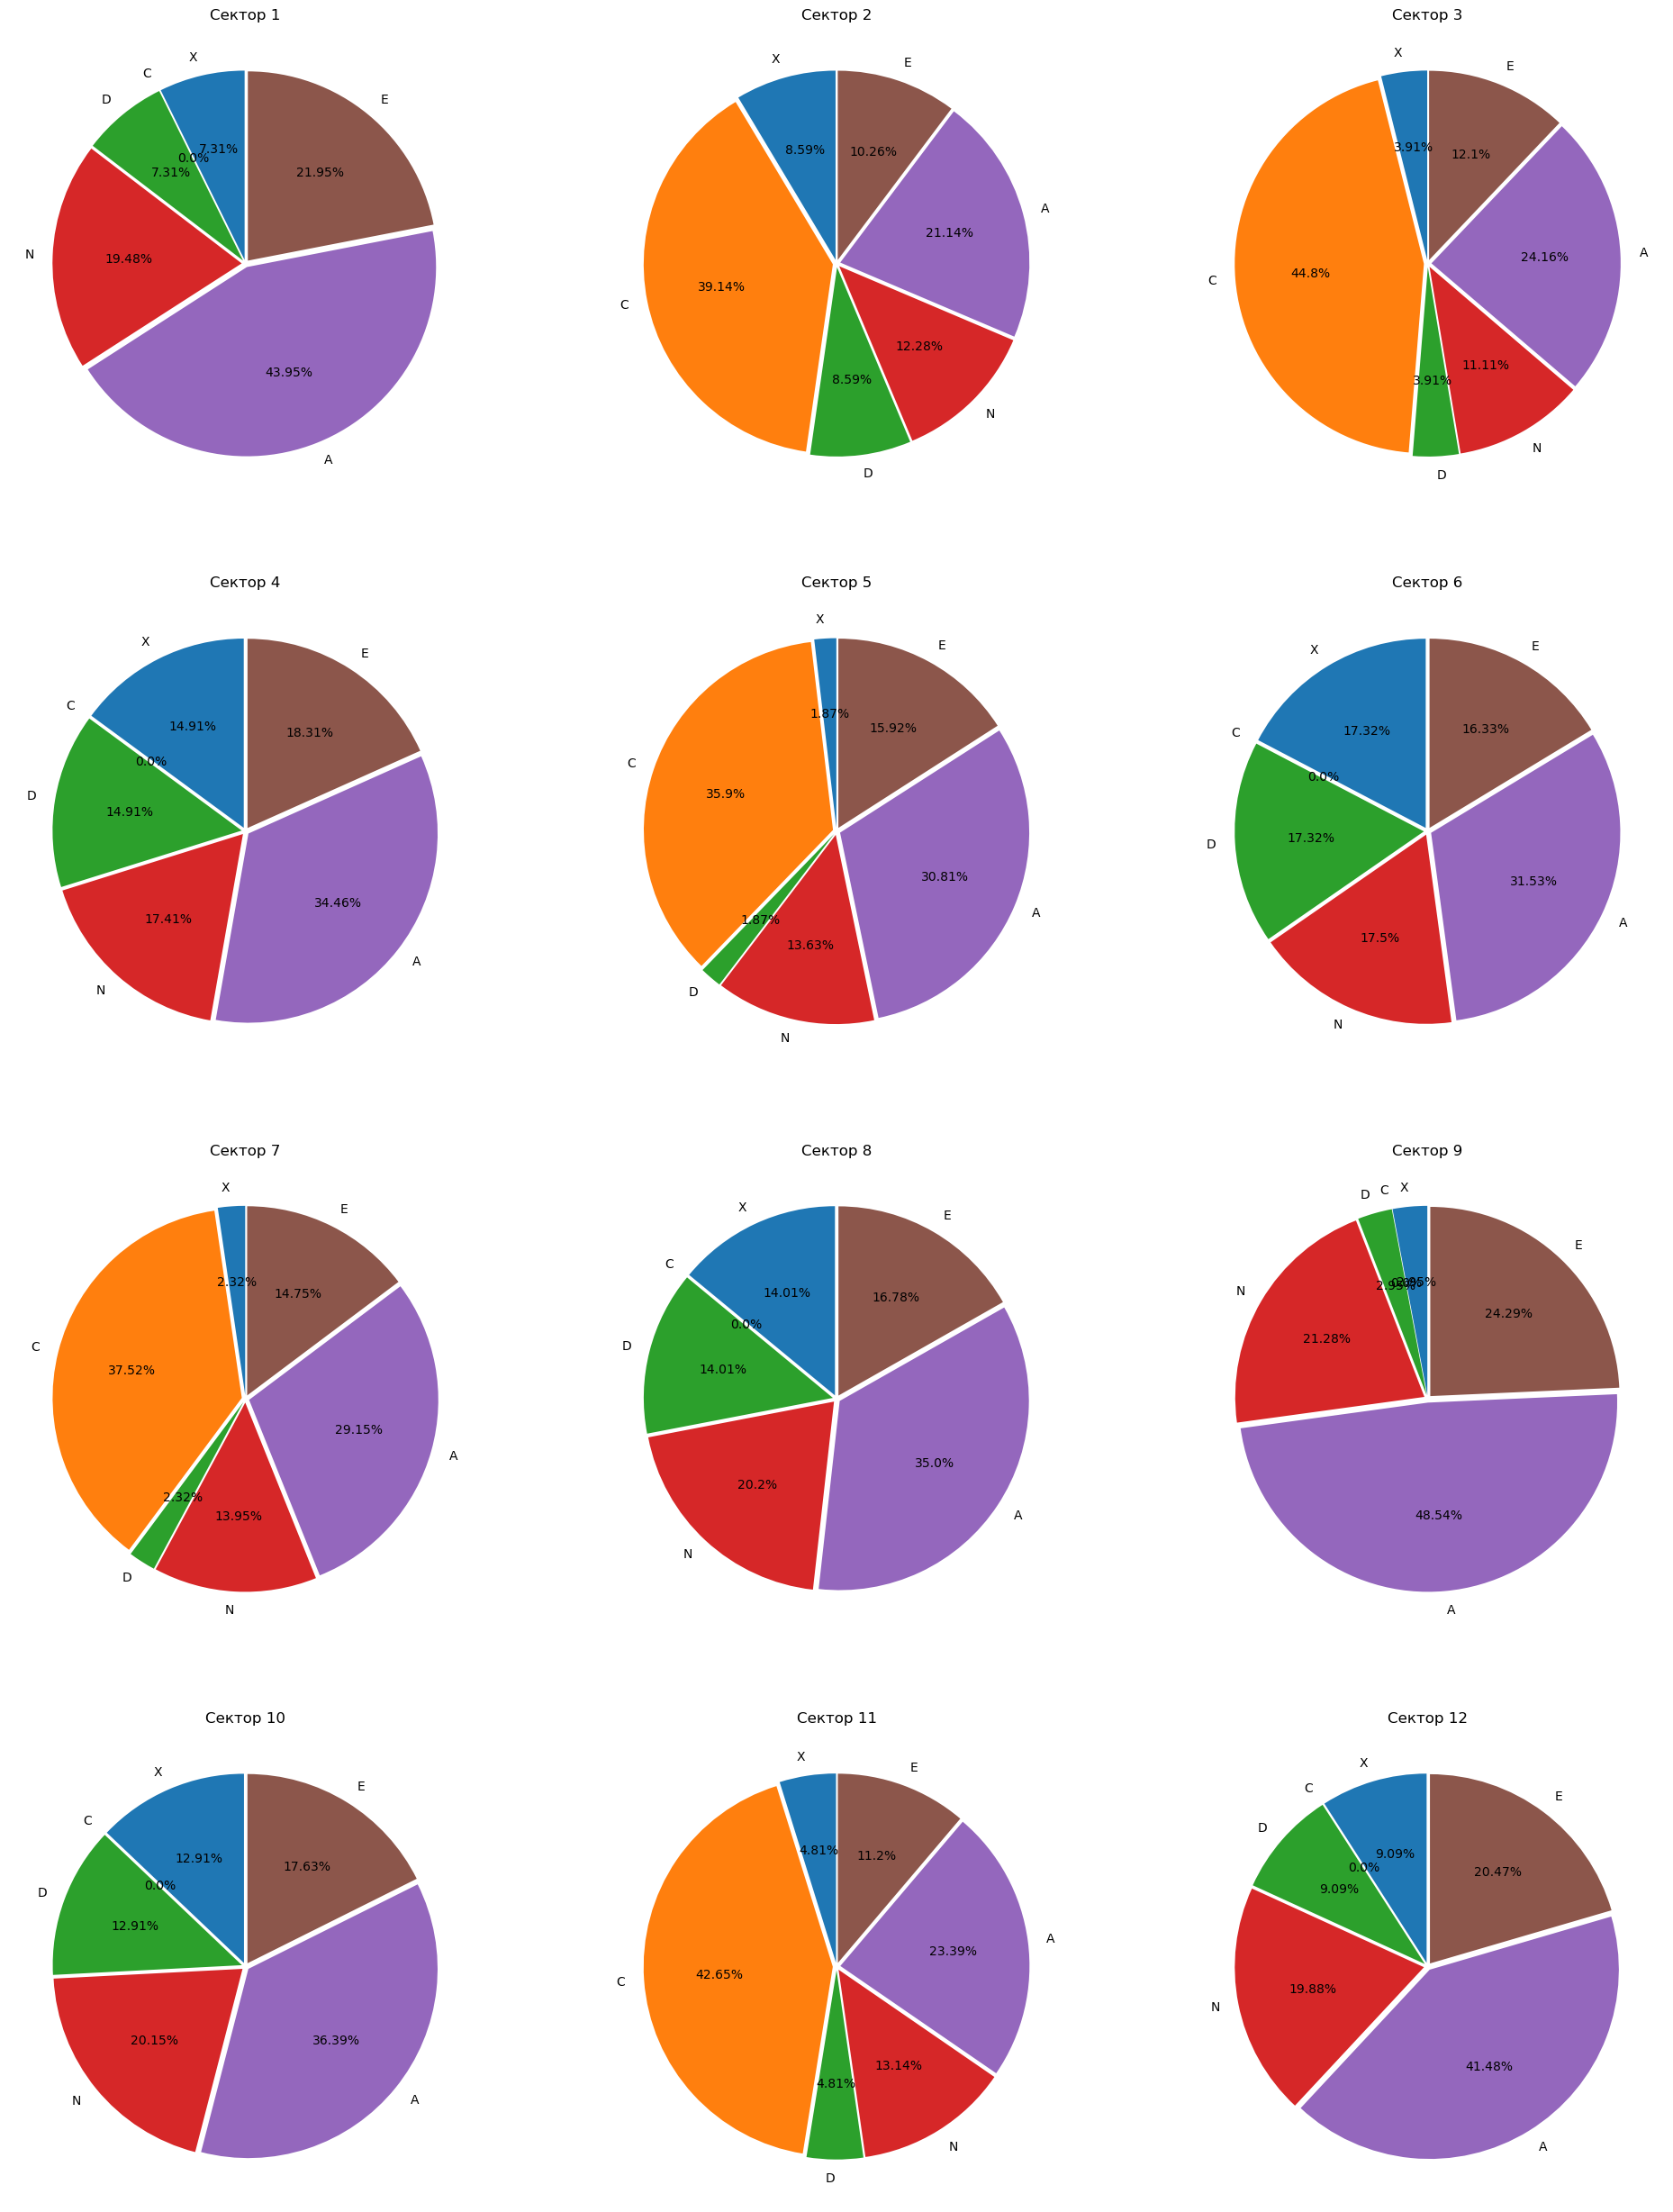

In [219]:
fig, axs = plt.subplots(nrows=4, ncols=3, dpi = 100, figsize = (8*3,8*4))
sp = np.array(sector_prob)

values = sp[:, :,1]
names = [list(map(lambda x: objects(x).name, el)) for el in list(sp[:, :,0])]

def make_autopct(values, acc=2):
    def my_autopct(pct):
        total = sum(values)
        return f'{np.round(pct, acc)}%'
    return my_autopct

for i in range(12):
    patches, texts, _ = axs[i//3][i%3].pie(values[i], labels = names[i], autopct = make_autopct(values[i]), startangle=90, explode=[0.02]*len(values[i]))
    axs[i//3][i%3].set(title = f'Сектор {i+1}')
#     axs[i//3][i%3].legend(patches, names[i], loc="best") # if you need legend just uncomment this
plt.show()

#### Вероятности по объектам - визуализация

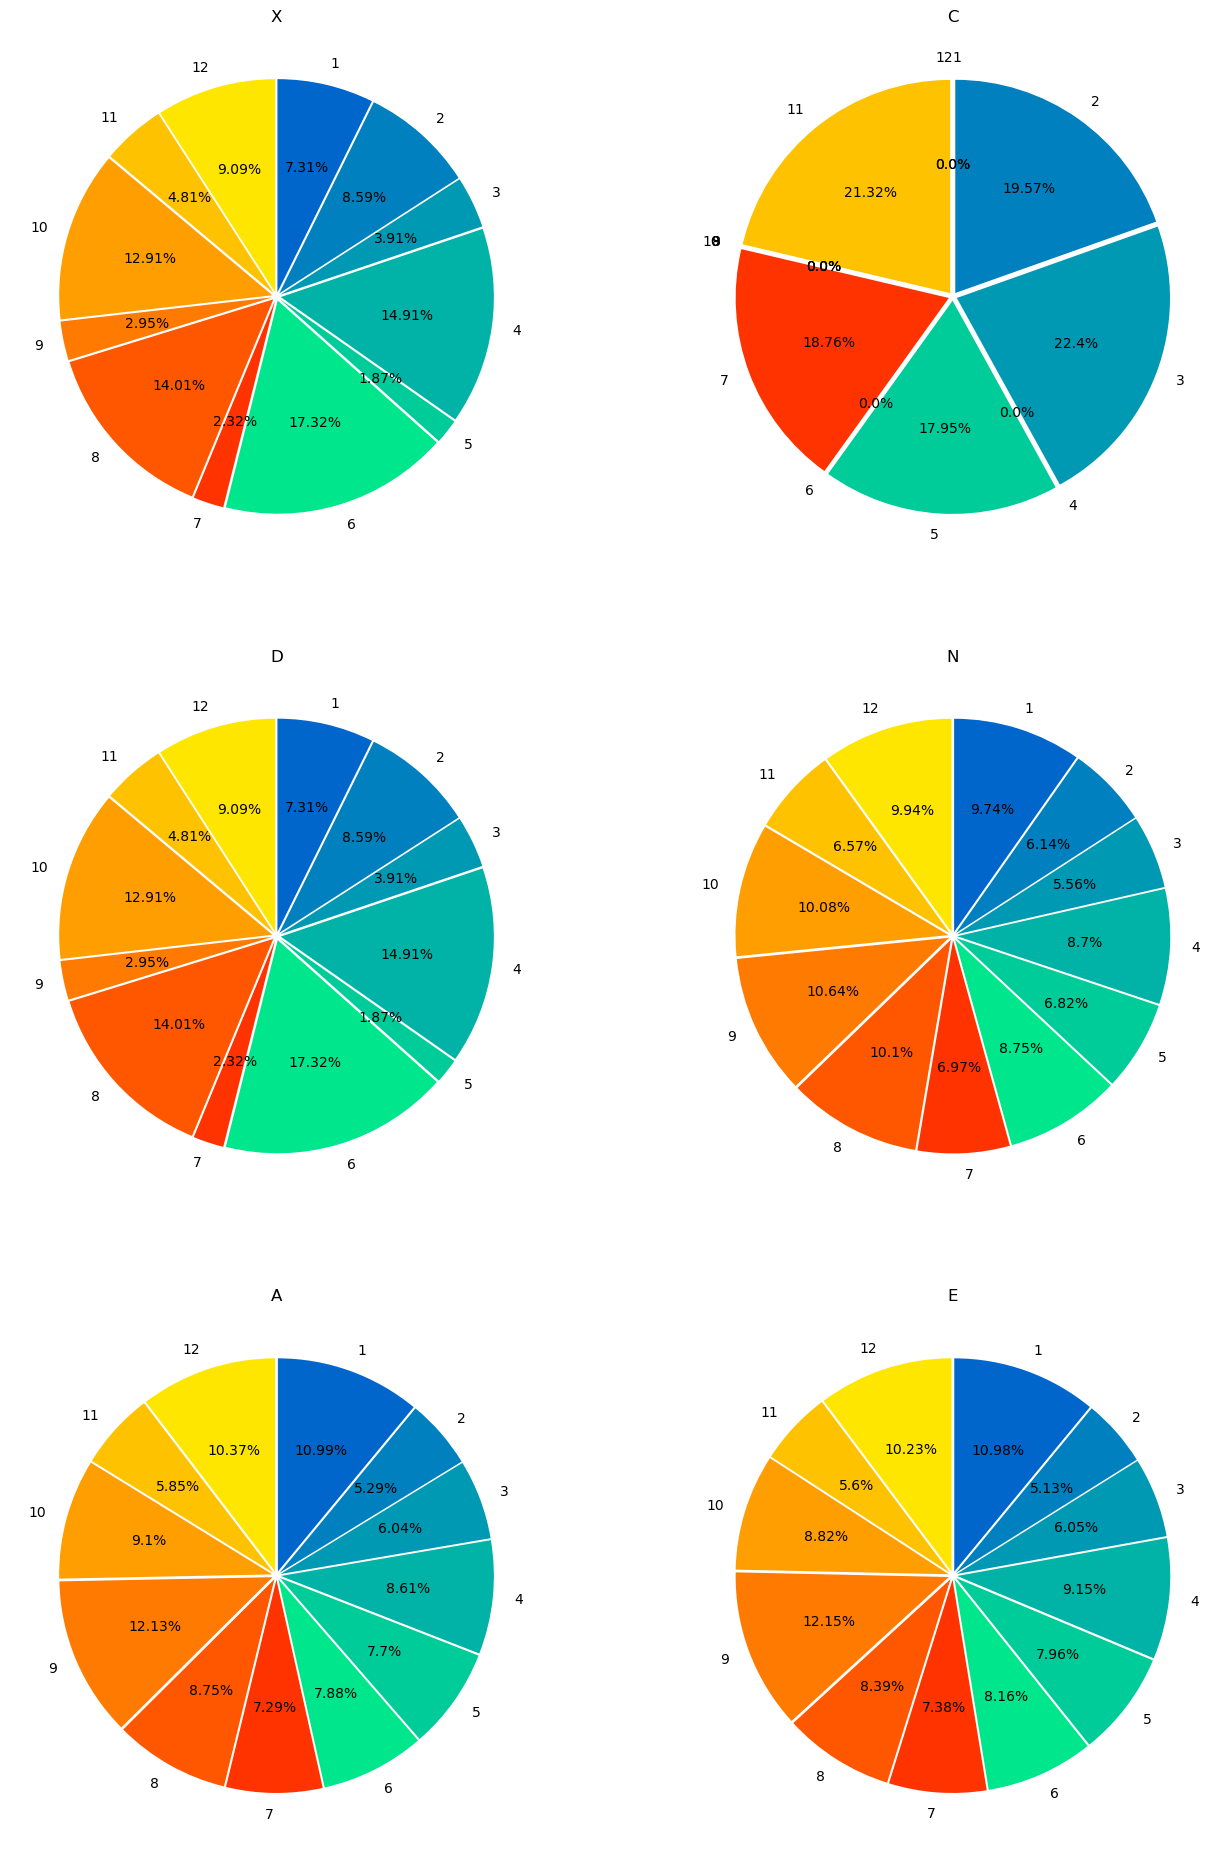

In [250]:
fig, axs = plt.subplots(nrows=3, ncols=2, dpi = 100, figsize = (8*2,8*3))
names = list(range(1,13))

colors = list(plt.cm.winter(np.linspace(0.4,0.9,6))) + list(plt.cm.autumn(np.linspace(0.2,0.9,6)))
def make_autopct(values, acc=2):
    def my_autopct(pct):
        total = sum(values)
        return f'{np.round(pct, acc)}%'
    return my_autopct

for i in range(len(objects)-1):
    patches, texts, _ = axs[i//2][i%2].pie(objects_prob[i], labels = names, autopct = make_autopct(objects_prob[i]), startangle=90, explode=[0.02]*len(objects_prob[i]), counterclock=False, colors = colors)
    axs[i//2][i%2].set(title = f'{objects(i+1).name}')
plt.show()